In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

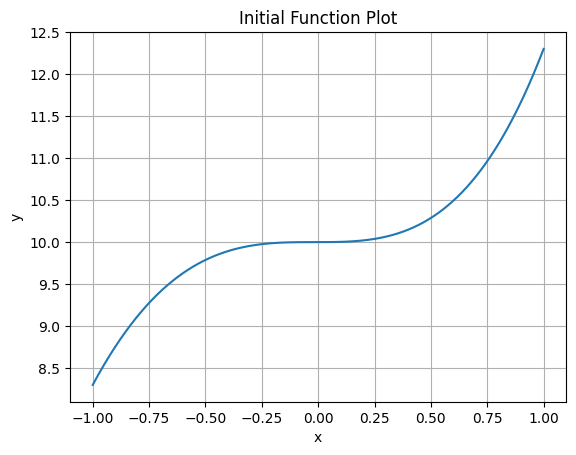

In [5]:
# Function to generate x and y values from the equation
def generate_data(num_samples=30000):
    x = np.linspace(-1, 1, num_samples)
    y = 0.2 * x**4 + 2 * x**3 + 0.1 * x**2 + 10
    return x.reshape(-1, 1), y.reshape(-1, 1)

# Plot the function
x_vals, y_vals = generate_data()
plt.plot(x_vals, y_vals)
plt.title("Initial Function Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

In [6]:
#Shuffle
def get_dataset(shuffle=True):
    x, y = generate_data()
    if shuffle:
        indices = np.arange(len(x))
        np.random.shuffle(indices)
        x = x[indices]
        y = y[indices]
    return x, y

In [7]:
#Data Split
def split_data(x, y):
    # Split into 30% train, 20% validation, 50% test
    x_temp, x_test, y_temp, y_test = train_test_split(x, y, test_size=0.5, random_state=42)
    x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=2/5, random_state=42)
    return x_train, x_val, x_test, y_train, y_val, y_test


In [8]:
#Scaling Function
def scale_data(x_train, x_val, x_test, y_train, y_val, y_test):
    x_scaler = MinMaxScaler()
    y_scaler = MinMaxScaler()

    x_train_scaled = x_scaler.fit_transform(x_train)
    x_val_scaled = x_scaler.transform(x_val)
    x_test_scaled = x_scaler.transform(x_test)

    y_train_scaled = y_scaler.fit_transform(y_train)
    y_val_scaled = y_scaler.transform(y_val)
    y_test_scaled = y_scaler.transform(y_test)

    return x_train_scaled, x_val_scaled, x_test_scaled, y_train_scaled, y_val_scaled, y_test_scaled, x_scaler, y_scaler

In [9]:
#Error Metrics Function
def print_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2 Score: {r2:.4f}")


In [10]:
#Neural Network Architectures
def build_model(structure=1, activation='relu'):
    model = Sequential()

    if structure == 1:
        model.add(Dense(12, input_dim=1, activation=activation))
        model.add(Dense(8, activation=activation))
        model.add(Dense(4, activation=activation))
    elif structure == 2:
        model.add(Dense(24, input_dim=1, activation=activation))

    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mse')
    return model


In [11]:
#Cases 1–5
def run_case(structure, activation, shuffle=True, scale=False, case_num=1):
    print(f"\nRunning Case {case_num}: Structure {structure}, Activation: {activation}, Shuffle: {shuffle}, Scaled: {scale}")

    x, y = get_dataset(shuffle)
    x_train, x_val, x_test, y_train, y_val, y_test = split_data(x, y)

    if scale:
        x_train, x_val, x_test, y_train, y_val, y_test, x_scaler, y_scaler = scale_data(
            x_train, x_val, x_test, y_train, y_val, y_test
        )
    model = build_model(structure=structure, activation=activation)
    model.fit(x_train, y_train, epochs=20, batch_size=12, validation_data=(x_val, y_val), verbose=0)

    y_pred = model.predict(x_test)

    # If scaled, reverse scale
    if scale:
        y_test = y_scaler.inverse_transform(y_test)
        y_pred = y_scaler.inverse_transform(y_pred)
        x_test = x_scaler.inverse_transform(x_test)

    print_metrics(y_test, y_pred)

    # Plot actual vs predicted
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(x_test, y_test, s=1, label="Actual")
    plt.title("Actual y vs x")
    plt.xlabel("x")
    plt.ylabel("y")

    plt.subplot(1, 2, 2)
    plt.scatter(x_test, y_pred, s=1, color="orange", label="Predicted")
    plt.title("Predicted y vs x")
    plt.xlabel("x")
    plt.ylabel("y")

    plt.tight_layout()
    plt.show()


Running Case 1: Structure 1, Activation: relu, Shuffle: True, Scaled: False


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 0.0172
MSE: 0.0005
RMSE: 0.0220
R2 Score: 0.9992


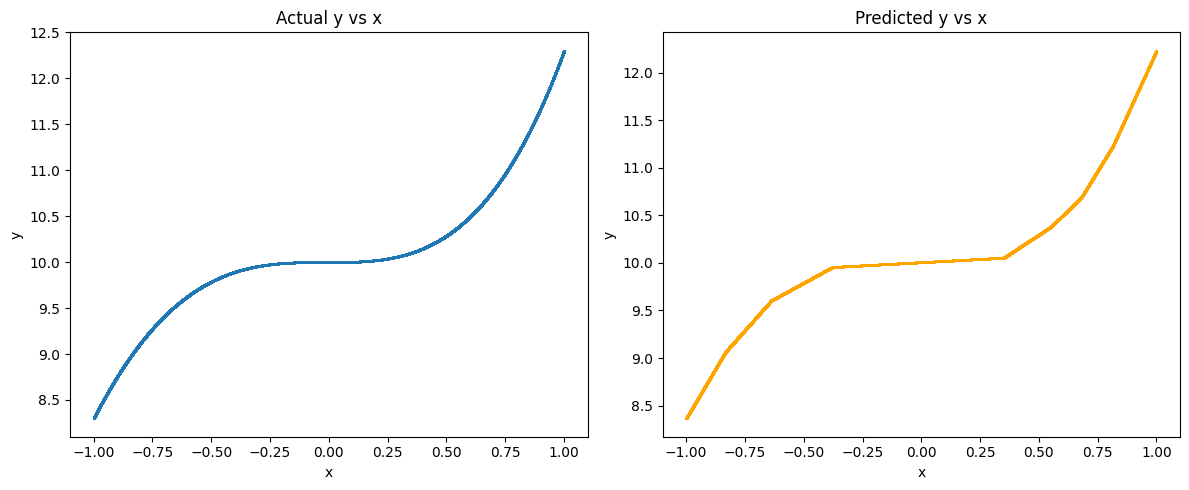


Running Case 2: Structure 2, Activation: relu, Shuffle: True, Scaled: False


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
MAE: 0.0221
MSE: 0.0007
RMSE: 0.0272
R2 Score: 0.9987


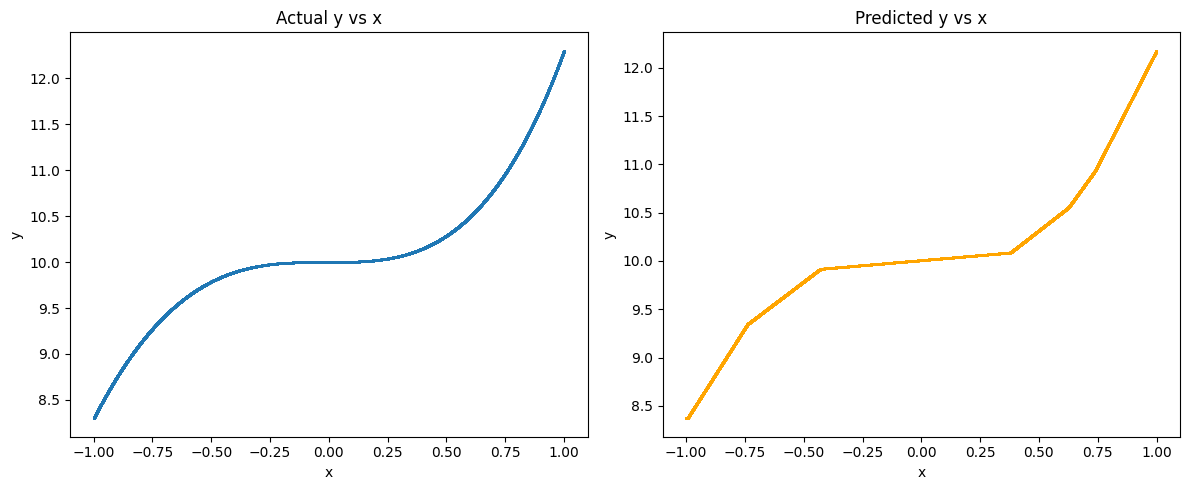


Running Case 3: Structure 1, Activation: tanh, Shuffle: True, Scaled: False


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 0.0205
MSE: 0.0008
RMSE: 0.0281
R2 Score: 0.9987


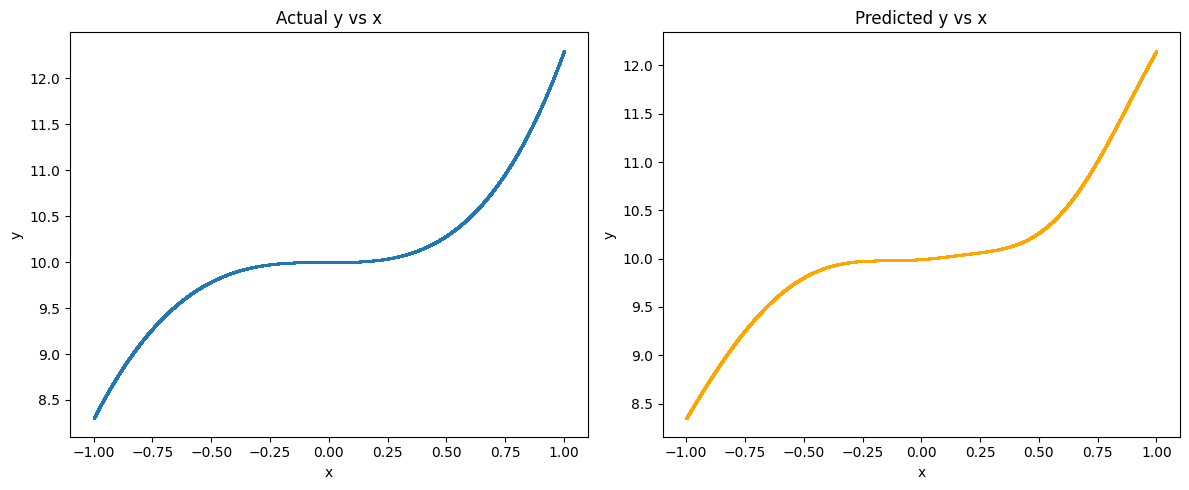


Running Case 4: Structure 1, Activation: relu, Shuffle: True, Scaled: True


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 0.2663
MSE: 0.1003
RMSE: 0.3167
R2 Score: 0.8267


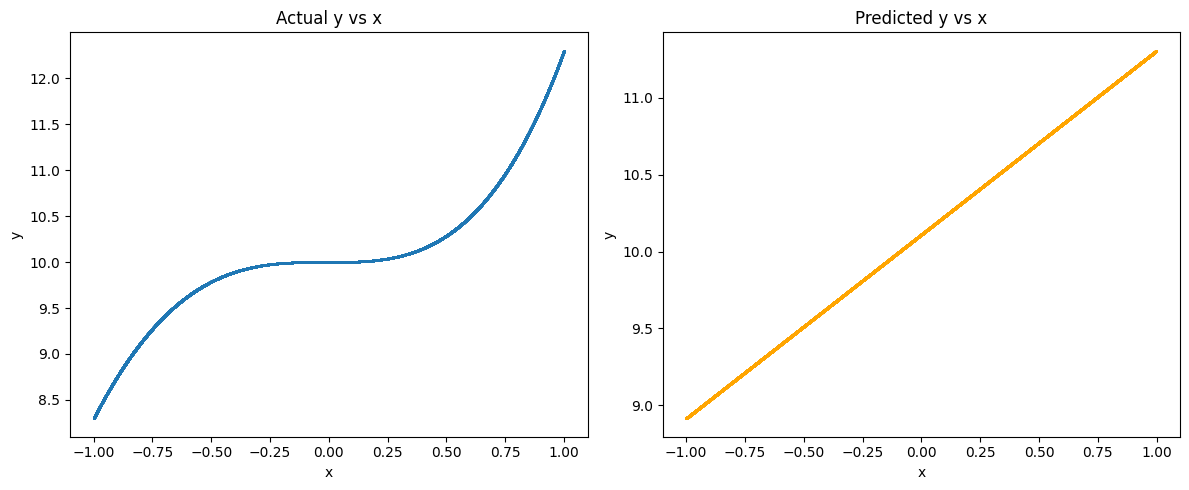


Running Case 5: Structure 1, Activation: tanh, Shuffle: True, Scaled: True


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 0.0438
MSE: 0.0032
RMSE: 0.0563
R2 Score: 0.9947


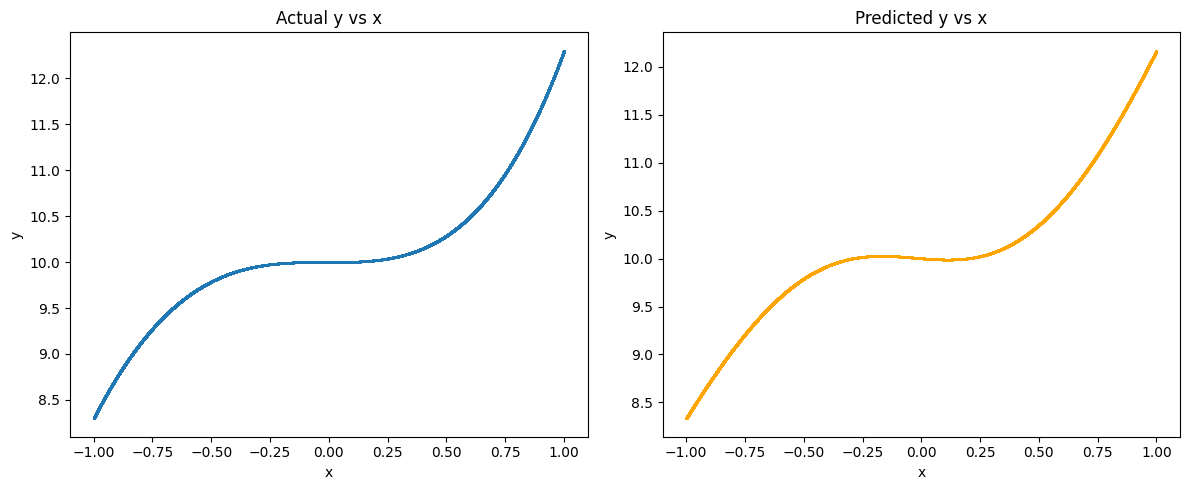

In [ ]:
#Run All 5 Cases
# Case 1: Structure 1, ReLU, shuffled, unscaled
run_case(structure=1, activation='relu', shuffle=True, scale=False, case_num=1)

# Case 2: Structure 2, ReLU, shuffled, unscaled
run_case(structure=2, activation='relu', shuffle=True, scale=False, case_num=2)

# Case 3: Structure 1, tanh, shuffled, unscaled
run_case(structure=1, activation='tanh', shuffle=True, scale=False, case_num=3)

# Case 4: Structure 1, ReLU, shuffled, scaled
run_case(structure=1, activation='relu', shuffle=True, scale=True, case_num=4)

# Case 5: Structure 1, tanh, shuffled, scaled
run_case(structure=1, activation='tanh', shuffle=True, scale=True, case_num=5)


In [12]:
#Cases 1–5 without shuffling
def run_case(structure, activation, shuffle=False, scale=False, case_num=1):
    print(f"\nRunning Case {case_num}: Structure {structure}, Activation: {activation}, Shuffle: {shuffle}, Scaled: {scale}")

    x, y = get_dataset(shuffle)
    x_train, x_val, x_test, y_train, y_val, y_test = split_data(x, y)

    if scale:
        x_train, x_val, x_test, y_train, y_val, y_test, x_scaler, y_scaler = scale_data(
            x_train, x_val, x_test, y_train, y_val, y_test
        )
    model = build_model(structure=structure, activation=activation)
    model.fit(x_train, y_train, epochs=20, batch_size=12, validation_data=(x_val, y_val), verbose=0)

    y_pred = model.predict(x_test)

    # If scaled, reverse scale
    if scale:
        y_test = y_scaler.inverse_transform(y_test)
        y_pred = y_scaler.inverse_transform(y_pred)
        x_test = x_scaler.inverse_transform(x_test)

    print_metrics(y_test, y_pred)

    # Plot actual vs predicted
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(x_test, y_test, s=1, label="Actual")
    plt.title("Actual y vs x")
    plt.xlabel("x")
    plt.ylabel("y")

    plt.subplot(1, 2, 2)
    plt.scatter(x_test, y_pred, s=1, color="orange", label="Predicted")
    plt.title("Predicted y vs x")
    plt.xlabel("x")
    plt.ylabel("y")

    plt.tight_layout()
    plt.show()


Running Case 1 (no shuffle): Structure 1, Activation: relu, Shuffle: False, Scaled: False


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 0.0170
MSE: 0.0005
RMSE: 0.0232
R2 Score: 0.9991


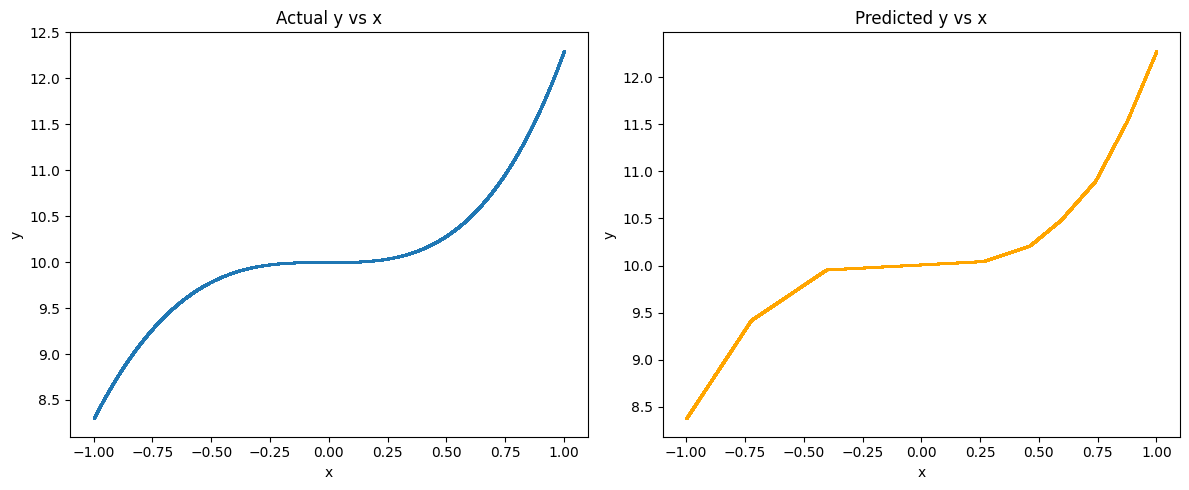


Running Case 2: Structure 2, Activation: relu, Shuffle: False, Scaled: False


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 0.1637
MSE: 0.0435
RMSE: 0.2086
R2 Score: 0.9242


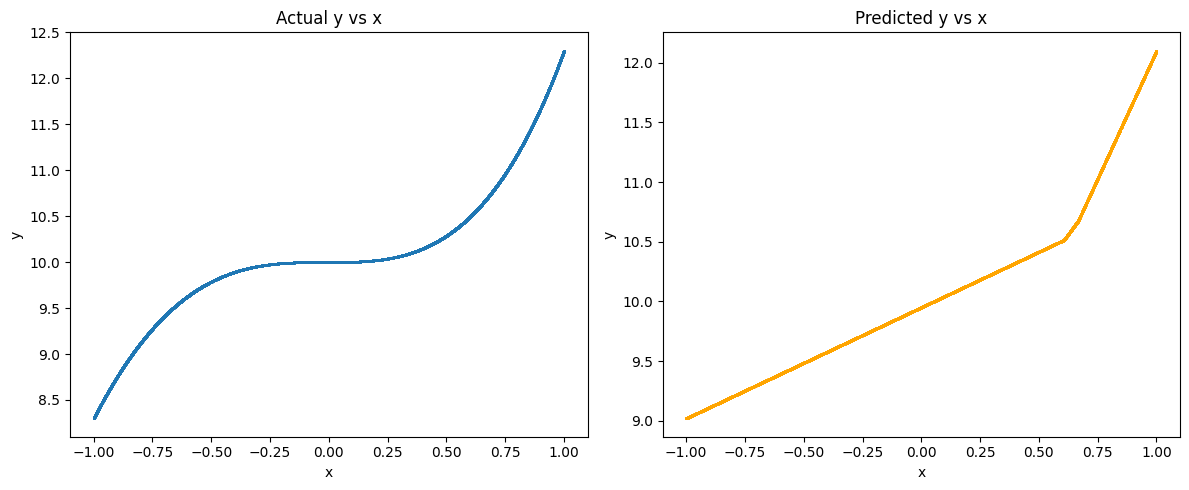


Running Case 3: Structure 1, Activation: tanh, Shuffle: False, Scaled: False


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 0.0096
MSE: 0.0002
RMSE: 0.0122
R2 Score: 0.9997


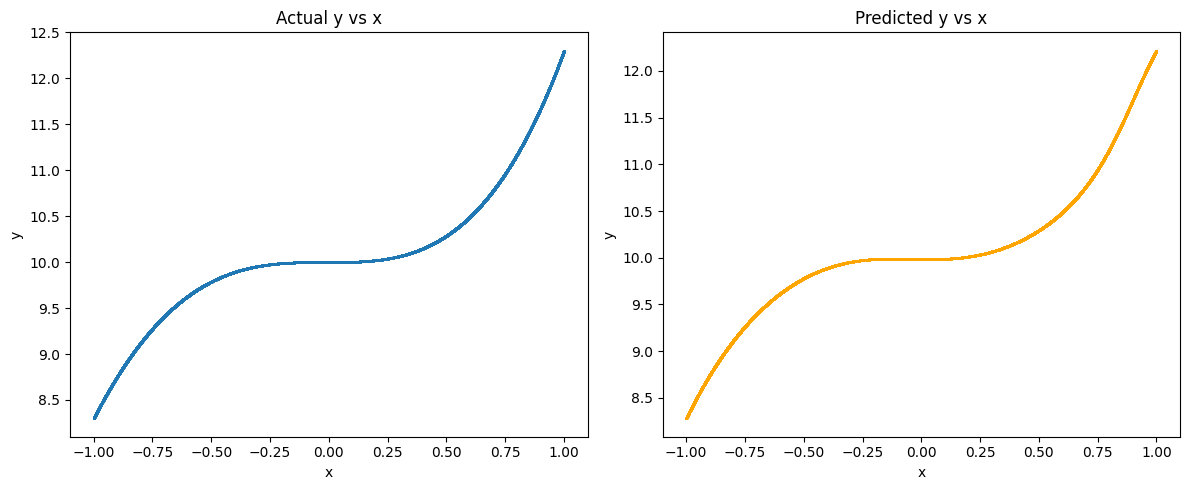


Running Case 4: Structure 1, Activation: relu, Shuffle: False, Scaled: True


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 0.0472
MSE: 0.0041
RMSE: 0.0643
R2 Score: 0.9928


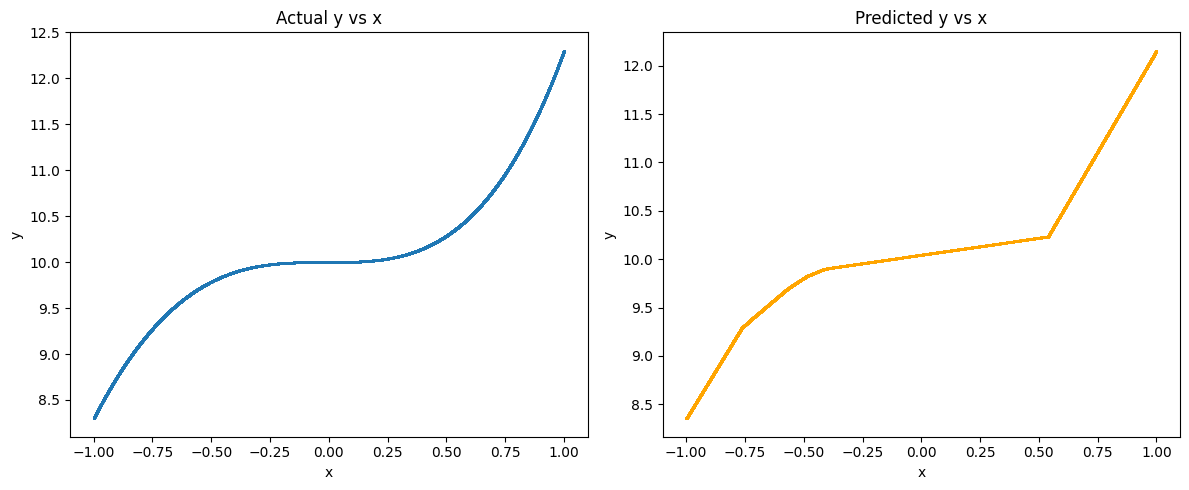


Running Case 5: Structure 1, Activation: tanh, Shuffle: False, Scaled: True


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 0.0152
MSE: 0.0003
RMSE: 0.0168
R2 Score: 0.9995


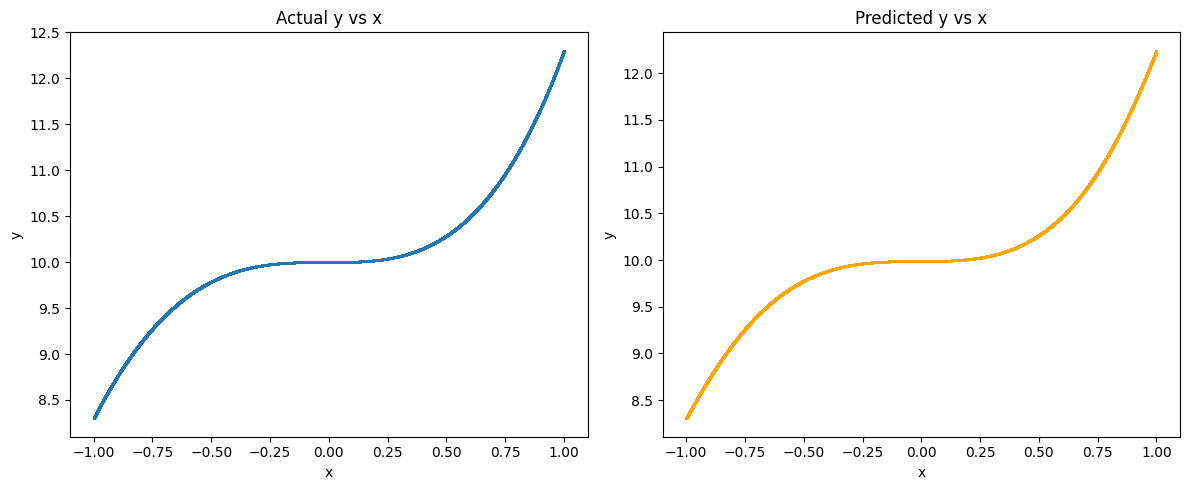

In [13]:
#Run All 5 Cases (unshuffled)
# Case 1: Structure 1, ReLU, unshuffled, unscaled
run_case(structure=1, activation='relu', shuffle=False, scale=False, case_num='1 (no shuffle)')

# Case 2: Structure 2, ReLU, unshuffled, unscaled
run_case(structure=2, activation='relu', shuffle=False, scale=False, case_num=2)

# Case 3: Structure 1, tanh, unshuffled, unscaled
run_case(structure=1, activation='tanh', shuffle=False, scale=False, case_num=3)

# Case 4: Structure 1, ReLU, unshuffled, scaled
run_case(structure=1, activation='relu', shuffle=False, scale=True, case_num=4)

# Case 5: Structure 1, tanh, unshuffled, scaled
run_case(structure=1, activation='tanh', shuffle=False, scale=True, case_num=5)


In [ ]:
#Q6
import numpy as np

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# XOR dataset
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# XOR expected outputs
y = np.array([[0], [1], [1], [0]])

# Random seed for reproducibility
np.random.seed(42)

# Initialize weights and biases randomly
input_layer_neurons = 2
hidden_layer_neurons = 2
output_neurons = 1

# Weights
wh = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
bh = np.random.uniform(size=(1, hidden_layer_neurons))
wo = np.random.uniform(size=(hidden_layer_neurons, output_neurons))
bo = np.random.uniform(size=(1, output_neurons))

# Learning rate
lr = 0.1

# Training the neural network
epochs = 10000
for epoch in range(epochs):
    # ------- Forward Pass -------
    hidden_input = np.dot(X, wh) + bh
    hidden_output = sigmoid(hidden_input)

    final_input = np.dot(hidden_output, wo) + bo
    final_output = sigmoid(final_input)

    # ------- Backward Pass -------
    error = y - final_output
    d_output = error * sigmoid_derivative(final_output)

    error_hidden = d_output.dot(wo.T)
    d_hidden = error_hidden * sigmoid_derivative(hidden_output)

    # ------- Update Weights and Biases -------
    wo += hidden_output.T.dot(d_output) * lr
    bo += np.sum(d_output, axis=0, keepdims=True) * lr
    wh += X.T.dot(d_hidden) * lr
    bh += np.sum(d_hidden, axis=0, keepdims=True) * lr

# Final predictions after training
print("Predictions after training:")
print(np.round(final_output, 3))

# Display actual output for comparison
print("Actual XOR outputs:")
print(y)

Predictions after training:
[[0.053]
 [0.952]
 [0.952]
 [0.052]]
Actual XOR outputs:
[[0]
 [1]
 [1]
 [0]]
